In [63]:
from acoli import acoli_hist
import numpy as np #numerical computing module
import matplotlib.pyplot as plt #plotting module
from PIL import Image

#when using a notebook, the line below will display any plots directly in it:
%matplotlib inline 

initpos = [0, 0] # range for x,y = [-2, 2]
foodfn_one = 1 # 1 or 2
foodfn_two = 2
rttp = 0.5 # P(transition btw run to tumble state)
ttrp = 0.5 # P(transition btw run state to tumble state)
ntrials = 5 # n trials starting at initnpos
nsteps = 10 # num updates during each trial (to the bacteria), aka num times to tumble or run
nbins = 100 # num bins to use in each dir for hte histogram (resolution of histogram)

[histm_food_function_one, food_function_one] = acoli_hist(initpos, foodfn_one, rttp, ttrp, ntrials, nsteps, nbins)
[histm_food_function_two, food_function_two] = acoli_hist(initpos, foodfn_two, rttp, ttrp, ntrials, nsteps, nbins)

In [64]:
food_function_one.shape # (50, 50)

(100, 100)

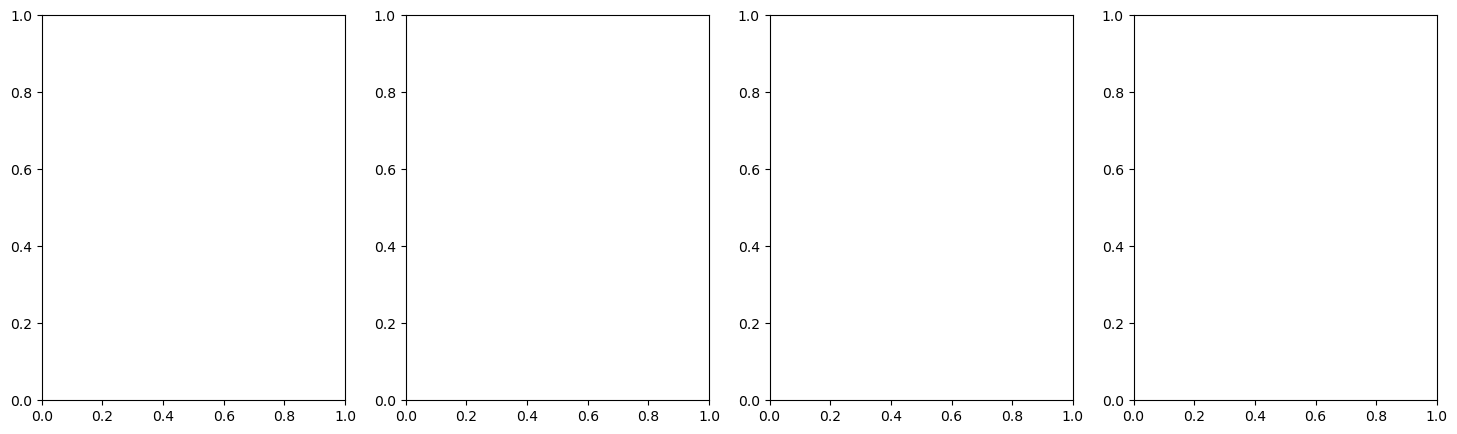

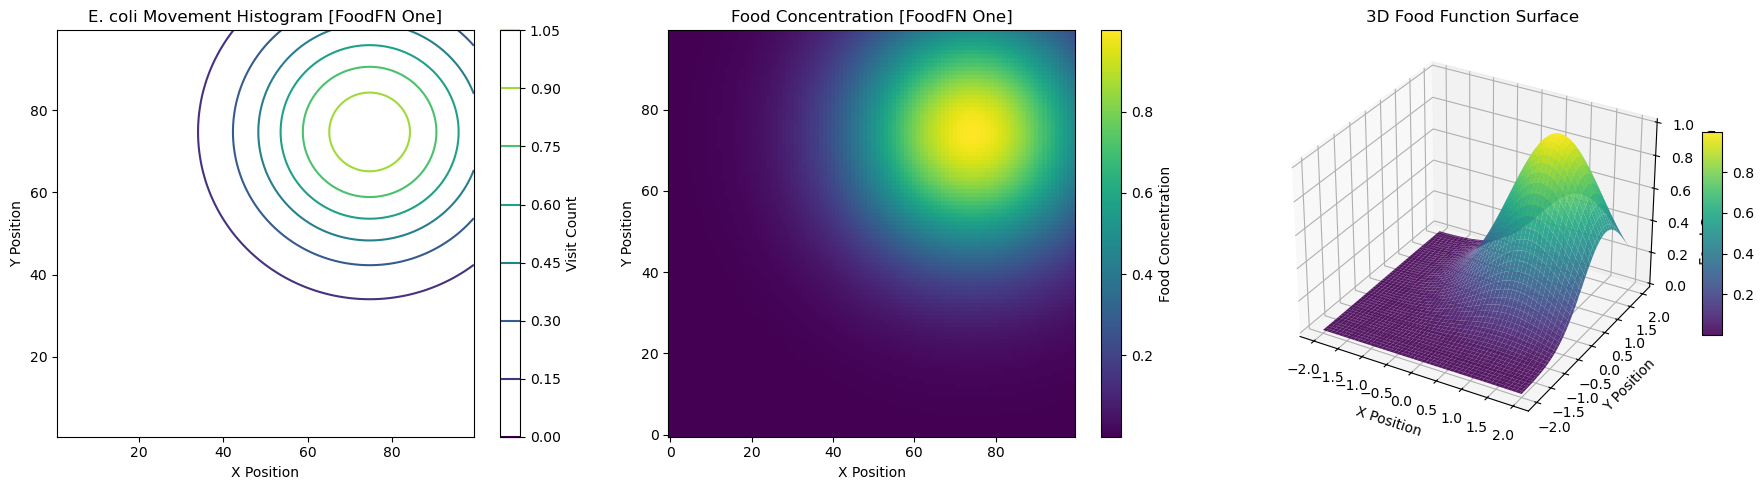

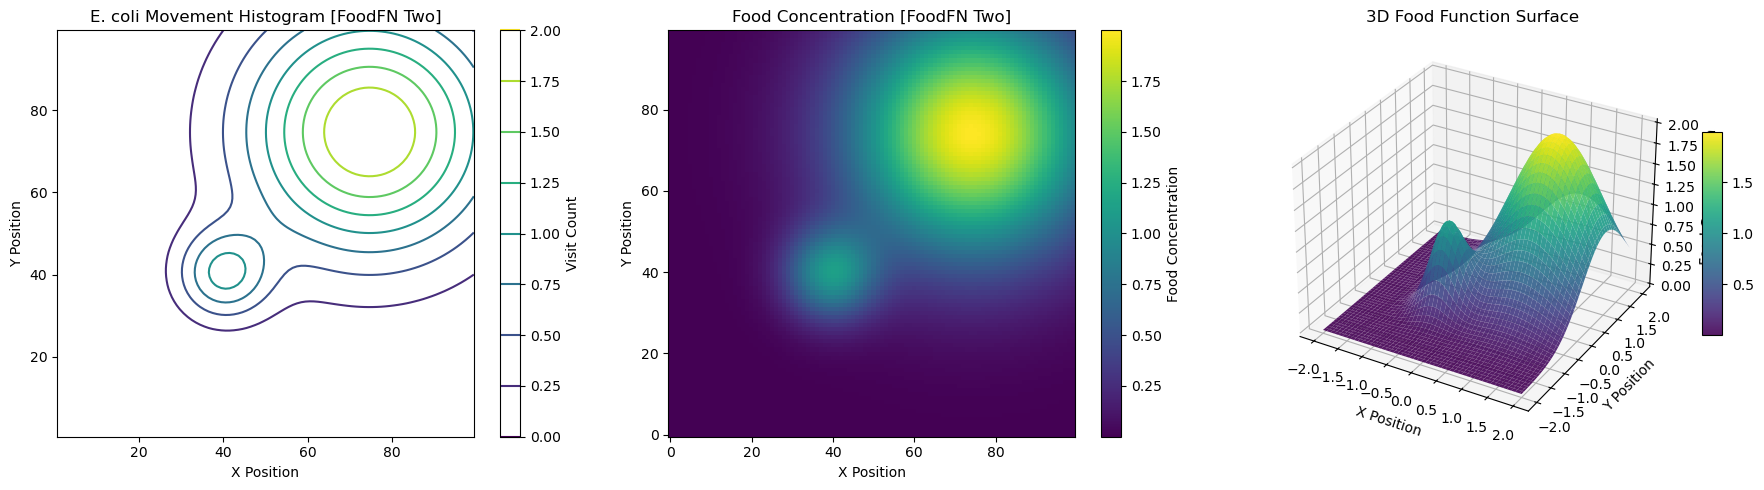

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# food function one figure
fig = plt.figure(figsize=(18, 5))

# plot contour food 
ax1 = fig.add_subplot(1, 3, 1)
im1 = ax1.contour(food_function_one, origin='lower', cmap='viridis')
ax1.set_title('E. coli Movement Histogram [FoodFN One]' )
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
plt.colorbar(im1, ax=ax1, label='Visit Count')

# plot concentration food
ax2 = fig.add_subplot(1, 3, 2)
im2 = ax2.imshow(food_function_one, origin='lower', cmap='viridis')
ax2.set_title('Food Concentration [FoodFN One]')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
plt.colorbar(im2, ax=ax2, label='Food Concentration')

# plot surfaces

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
x = np.linspace(-2, 2, food_function_one.shape[1]) # x coords, range -2, 2
y = np.linspace(-2, 2, food_function_one.shape[1]) # y coords, also range -2 2
X, Y = np.meshgrid(x, y)
surface = ax3.plot_surface(X, Y, food_function_one, cmap='viridis', alpha=0.9)
ax3.set_xlabel('X Position')
ax3.set_ylabel('Y Position')
ax3.set_zlabel('Food Concentration')
ax3.set_title('3D Food Function Surface')
fig.colorbar(surface, ax=ax3, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

# food function one figure
fig = plt.figure(figsize=(18, 5))

# plot contour food 
ax1 = fig.add_subplot(1, 3, 1)
im1 = ax1.contour(food_function_two, origin='lower', cmap='viridis')
ax1.set_title('E. coli Movement Histogram [FoodFN Two]' )
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
plt.colorbar(im1, ax=ax1, label='Visit Count')

# plot concentration food
ax2 = fig.add_subplot(1, 3, 2)
im2 = ax2.imshow(food_function_two, origin='lower', cmap='viridis')
ax2.set_title('Food Concentration [FoodFN Two]')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
plt.colorbar(im2, ax=ax2, label='Food Concentration')

# plot surfaces
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
x = np.linspace(-2, 2, food_function_two.shape[1]) # x coords, range -2, 2
y = np.linspace(-2, 2, food_function_two.shape[1]) # y coords, also range -2 2
X, Y = np.meshgrid(x, y)
surface = ax3.plot_surface(X, Y, food_function_two, cmap='viridis', alpha=0.9)
ax3.set_xlabel('X Position')
ax3.set_ylabel('Y Position')
ax3.set_zlabel('Food Concentration')
ax3.set_title('3D Food Function Surface')
fig.colorbar(surface, ax=ax3, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()


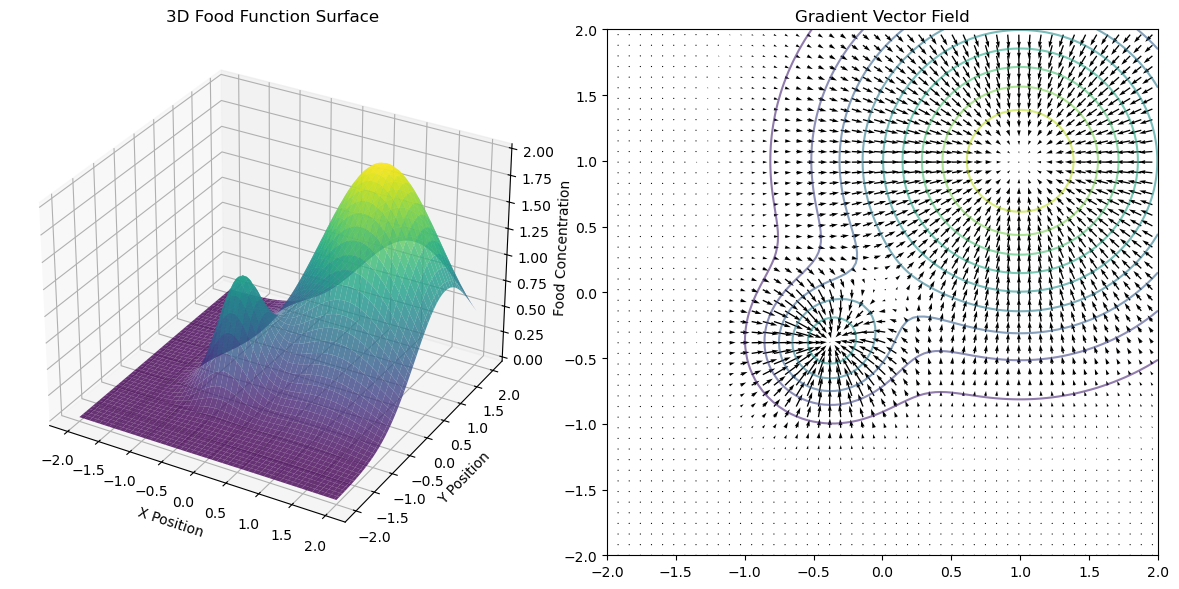

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
grad_y, grad_x = np.gradient(food_function_two)

fig = plt.figure(figsize=(18, 6))

# 3d surface
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
surface = ax1.plot_surface(X, Y, food_function_two, cmap='viridis', alpha=0.8)
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
ax1.set_zlabel('Food Concentration')
ax1.set_title('3D Food Function Surface')

# 2d gradient vector field
ax2 = fig.add_subplot(1, 3, 2)
ax2.contour(X, Y, food_function_two, levels=10, alpha=0.6)
ax2.quiver(X[::2, ::2], Y[::2, ::2], grad_x[::2, ::2], grad_y[::2, ::2]) # just show every second arrow
ax2.set_title('Gradient Vector Field')

plt.tight_layout()
plt.show()


In [67]:
from acoli import acoli_hist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline 

initpos = [0, 0] # range for x,y = [-2, 2]
foodfn_one = 1 # 1 or 2
ntrials = 100 # n trials starting at initnpos
nsteps = 200 # num updates during each trial (to the bacteria), aka num times to tumble or run
nbins = 50 # num bins to use in each dir for hte histogram 
bin_trials = [10, 50, 100, 500] # bins along each axis

# Parameter ranges to test
rttp_values = np.arange(0.1, 1.0, 0.2)  # steps of 0.1
ttrp_values = np.arange(0.1, 1.0, 0.2)  # 81 combinations

def launch_simulation(initpos, foodfn, ntrials, nsteps, nbins, trials, rttp_values, ttrp_values):
    results = []
    best_score = -np.inf
    best_params = None
    best_histograms = []

    for i, rttp in enumerate(rttp_values):
        for j, ttrp in enumerate(ttrp_values):
            combination_num = i * len(ttrp_values) + j + 1
            
            histograms = []
            scores = []
            
            for bin_size in trials:
                [histm_ff1, ff1] = acoli_hist(initpos, foodfn, rttp, ttrp, ntrials, nsteps, bin_size)
                histograms.append(histm_ff1)
                food_seen = np.sum(histm_ff1 * ff1) / np.sum(histm_ff1)
                scores.append(food_seen)
            
            # avg score across different bin sizes
            avg_score = np.mean(scores)
            
            # store results for this combination
            results.append({
                'rttp': rttp,
                'ttrp': ttrp,
                'score': avg_score,
                'histograms': histograms.copy()
            })
            
            # update best combination if this is better
            if max(scores) > best_score:
                best_score = max(scores)
                best_params = (rttp, ttrp)
                best_histograms = histograms.copy()
                print(f"*** New Top  Score: {avg_score:.2f} ***")

    print(f"*** Best parameters: ***")
    print(f"*** rttp (run-to-tumble): {best_params[0]:.1f} ***")
    print(f"*** ttrp (tumble-to-run): {best_params[1]:.1f} ***")
    print(f"*** Score: {best_score:.2f} ***")

    # show the best histograms
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'OPTIMAL RESULTS: rttp={best_params[0]:.1f}, ttrp={best_params[1]:.1f}, Score={best_score:.2f}', 
                fontsize=16, fontweight='bold')

    for ax, histogram, bin_size in zip(axes, best_histograms, bin_trials):
        im = ax.imshow(histogram, cmap='viridis', origin='lower')
        ax.set_title(f'Bins: {bin_size}', fontsize=12, fontweight='bold')
        ax.set_xlabel('X Position')
        ax.set_ylabel('Y Position')
        
        # add colorbar for each subplot
        plt.colorbar(im, ax=ax, shrink=0.8)

    plt.tight_layout()
    plt.show()

    # heatmap of all results
    score_matrix = np.zeros((len(rttp_values), len(ttrp_values)))
    for result in results:
        i = np.where(rttp_values == result['rttp'])[0][0]
        j = np.where(ttrp_values == result['ttrp'])[0][0]
        score_matrix[i, j] = result['score']

    # plot heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(score_matrix, cmap='viridis', aspect='auto', origin='lower')
    ax.set_xlabel('ttrp (Tumble-to-Run Probability)', fontsize=12)
    ax.set_ylabel('rttp (Run-to-Tumble Probability)', fontsize=12)
    ax.set_title('Parameter Optimization Heatmap', fontsize=14, fontweight='bold')

    ax.set_xticks(range(len(ttrp_values)))
    ax.set_yticks(range(len(rttp_values)))
    ax.set_xticklabels([f'{val:.1f}' for val in ttrp_values])
    ax.set_yticklabels([f'{val:.1f}' for val in rttp_values])

    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Optimization Score', fontsize=12)

    # mark optimal point box
    opt_i = np.where(rttp_values == best_params[0])[0][0]
    opt_j = np.where(ttrp_values == best_params[1])[0][0]
    ax.plot(opt_j, opt_i, 'r*', markersize=20, markeredgecolor='white', markeredgewidth=2)
    ax.text(opt_j, opt_i-0.3, 'OPTIMAL', ha='center', va='top', color='white', 
            fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

    return best_score, best_params[0], best_params[1]


In [68]:
# Test for food function one, produce optional combinations
best_score, best_p_rttp, best_p_ttrp = launch_simulation(initpos=[0,0], foodfn=1, ntrials=100, nsteps=200, nbins=50, bin_trails=[10,50,100,500], rttp_values=rttp_values, ttrp_values=ttrp_values)

TypeError: launch_simulation() got an unexpected keyword argument 'bin_trails'

In [ ]:
# Test simulation with optimal P(rttp) and P(ttrp) 
# found using food function 1 on food function 2.
bin_trials = [10, 50, 100, 500]
histograms = []
scores = []
for bin_size in bin_trials:
    [histm_ff1, ff1] = acoli_hist(initpos, foodfn_one, rttp, ttrp, ntrials, nsteps, bin_size)
    histograms.append(histm_ff1)
    food_seen = np.sum(histm_ff1 * ff1) / np.sum(histm_ff1)
    scores.append(food_seen)

avg_score = np.mean(scores)
print(f"Average Score: {avg_score:.1f}")

Average Score: 0.3


*** New Top  Score: 0.70 ***
*** New Top  Score: 0.99 ***
*** New Top  Score: 1.26 ***
*** New Top  Score: 1.31 ***
*** New Top  Score: 1.32 ***
*** New Top  Score: 1.36 ***
*** Best parameters: ***
*** rttp (run-to-tumble): 0.9 ***
*** ttrp (tumble-to-run): 0.5n***
*** Score: 1.44 ***


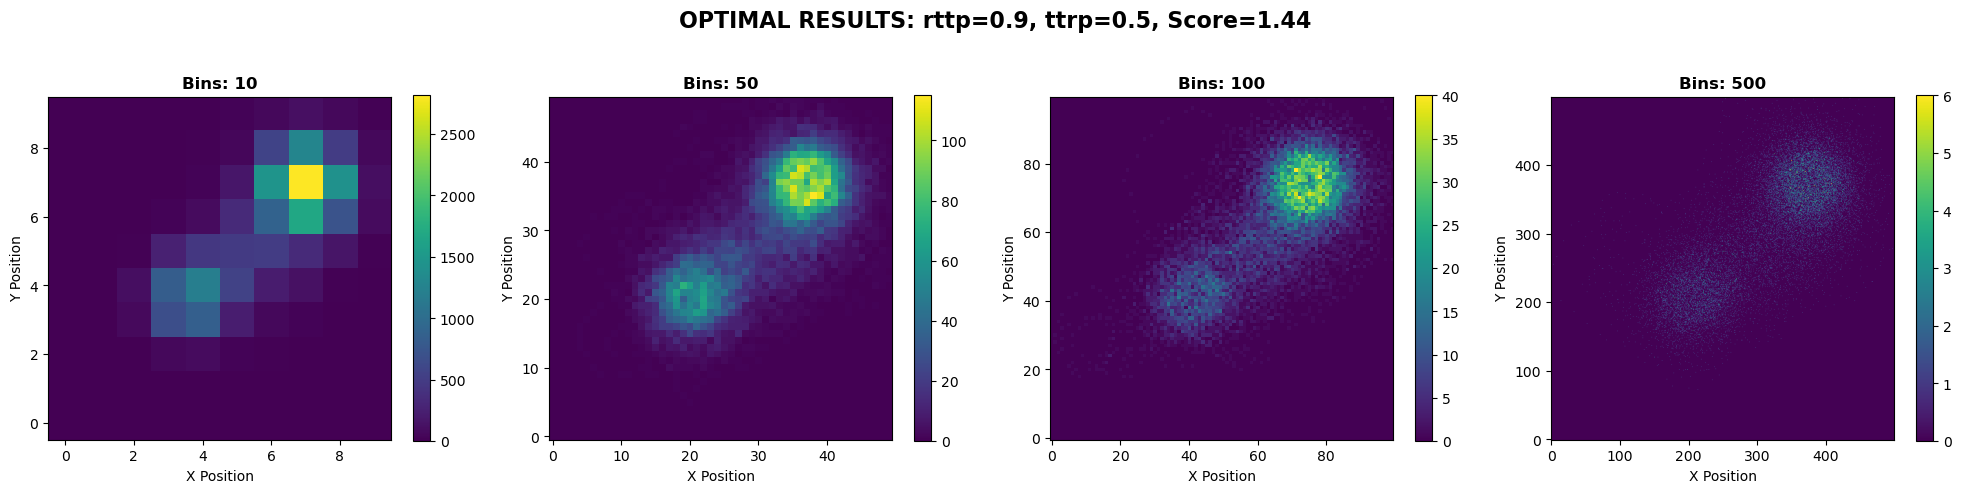

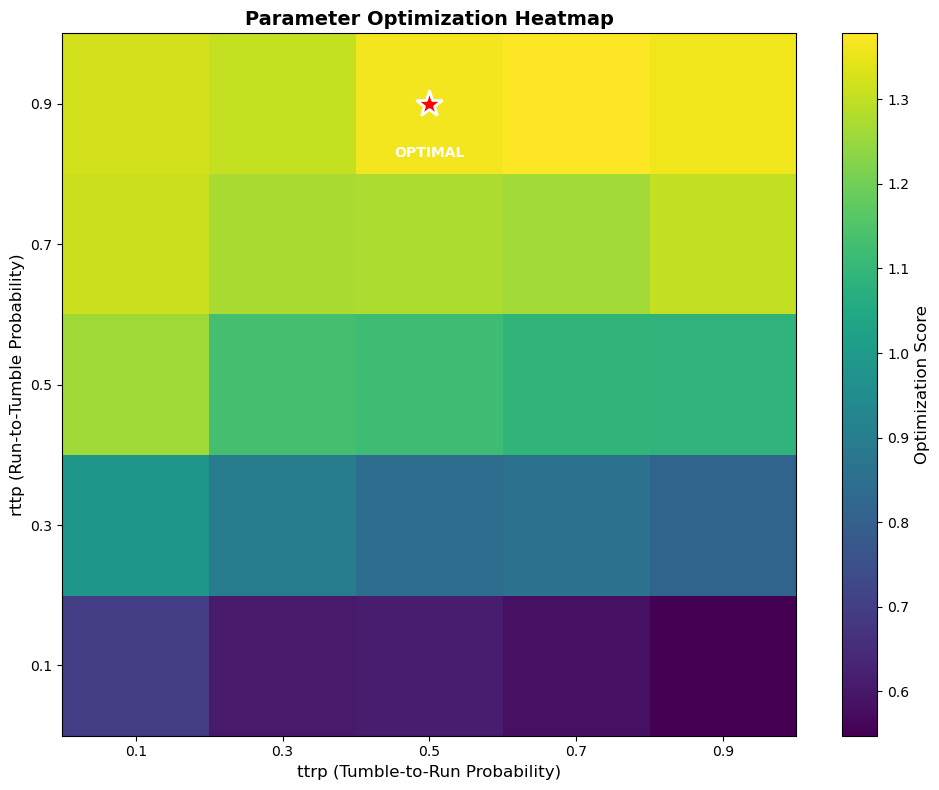

In [ ]:
# Test for food function two, produce optional combinations
best_score_ffn2, best_p_rttp_ffn2, best_p_ttrp_ffn2 =  launch_simulation(initpos=[0,0], foodfn=2, ntrials=100, nsteps=200, nbins=50, bin_trails=[10,50,100,500], rttp_values=rttp_values, ttrp_values=ttrp_values)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(18, 5))
for ax, histogram in zip(axes, histograms):
    ax.imshow(histogram)
plt.show()

NameError: name 'histograms' is not defined

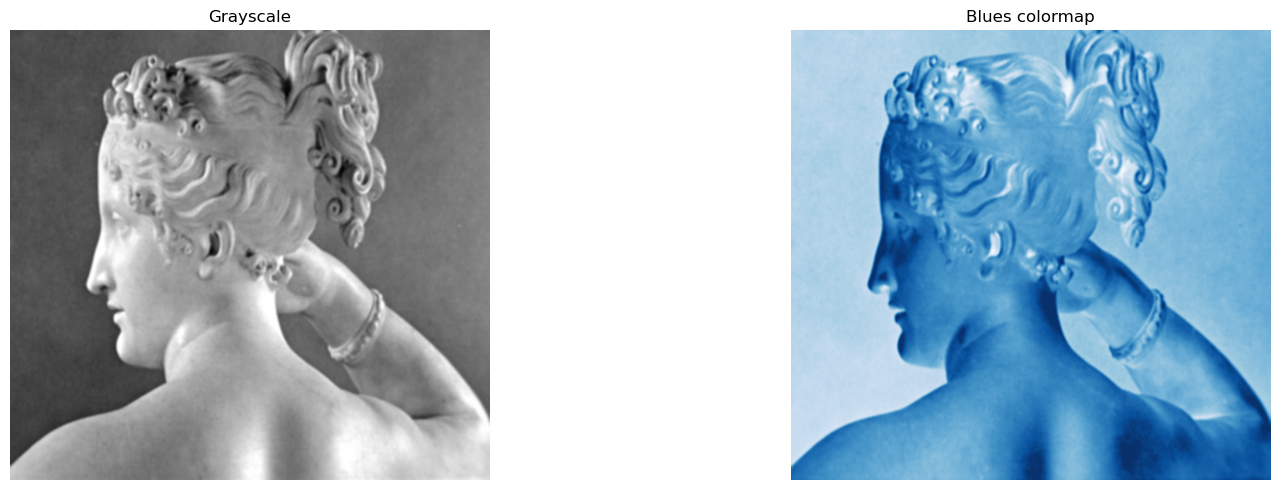

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = 'Paolina-1.tiff'
im = np.array(Image.open(image))

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].imshow(im, cmap='gray')
ax[0].set_title('Grayscale')
ax[0].axis('off')

ax[1].imshow(im, cmap='Blues')
ax[1].set_title('Blues colormap')
ax[1].axis('off')

plt.tight_layout()
plt.show()

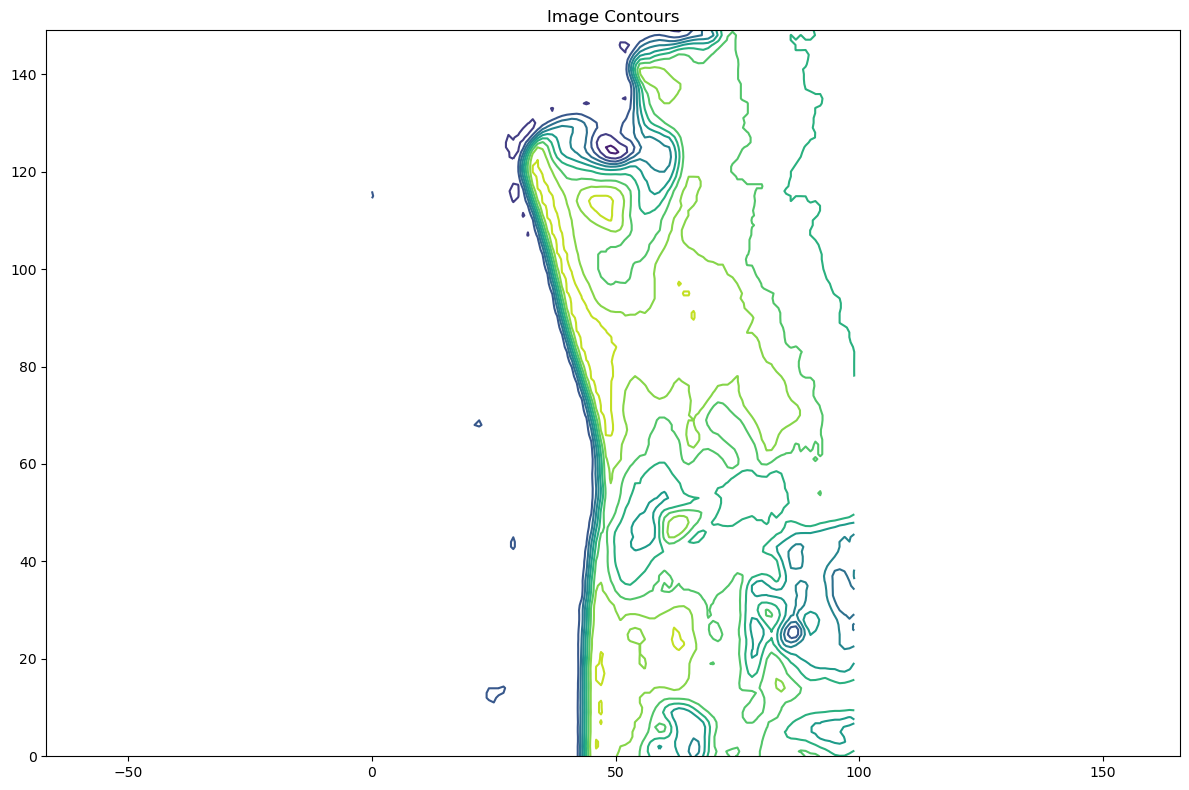

In [72]:
gray = im.astype('float')/255
h,w = gray.shape
x = np.arange(0, w)
y = np.arange(0,h)
x, y =np.meshgrid(x,y)
plt.figure(figsize=(12, 8))
plt.contour(x, y, gray, levels=10, origin='upper')
plt.title('Image Contours')
plt.axis('equal')
plt.tight_layout()
plt.show()

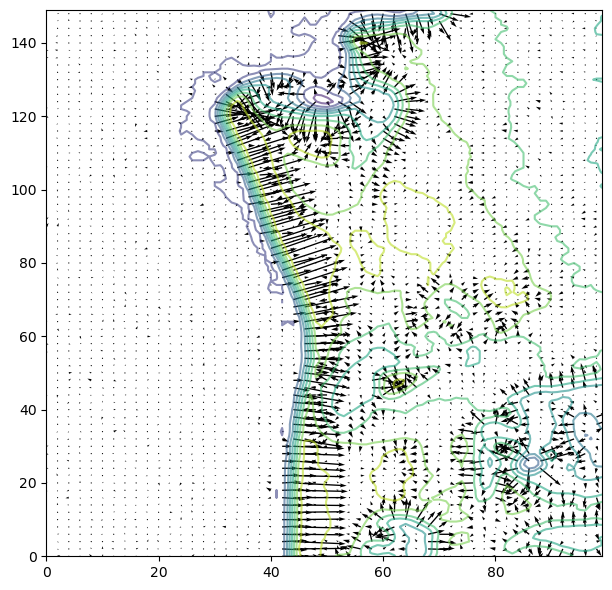

In [71]:
image = 'Paolina-1.tiff'
im = np.array(Image.open(image))

im = im.astype('float')/255
im = im[150:300, 50:150]
h, w = im.shape
x = np.arange(0, w)
y = np.arange(0, h)
X,Y = np.meshgrid(x,y)
grad_y, grad_x = np.gradient(im)
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 3, 2)
ax.contour(X, Y, im, levels=10, alpha=0.6)
show_every_n_times = 2 # show every 2 arrows to make more visible
ax.quiver(X[::show_every_n_times, ::show_every_n_times], 
           Y[::show_every_n_times, ::show_every_n_times], 
           grad_x[::show_every_n_times, ::show_every_n_times], 
           grad_y[::show_every_n_times, ::show_every_n_times]) 
ax2.set_title('Gradient Vector Field')
plt.tight_layout()
plt.show()

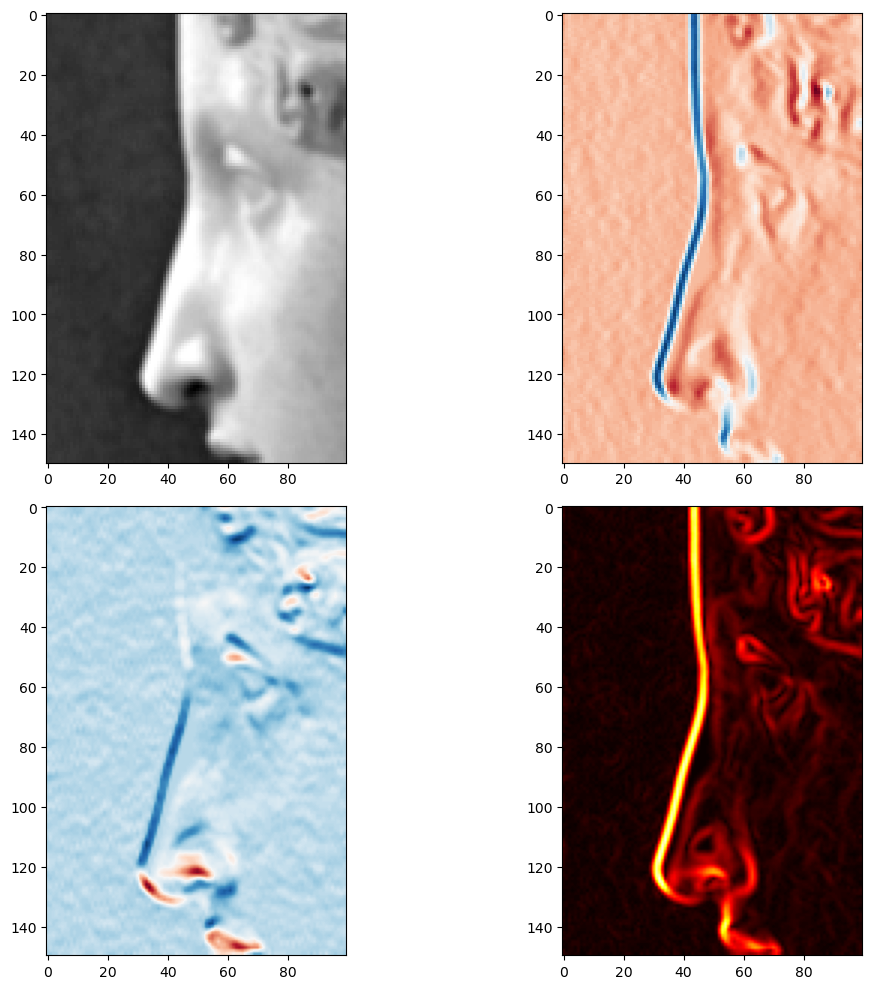

In [ ]:
image = 'Paolina-1.tiff'
im = np.array(Image.open(image))

im = im.astype('float')/255
im = im[150:300, 50:150]
h, w = im.shape
x = np.arange(0, w)
y = np.arange(0, h)
X,Y = np.meshgrid(x,y)
grad_y, grad_x = np.gradient(im)
grad_x_squared = grad_x**2
grad_y_squared = grad_y**2
magnitude = np.sqrt(grad_x_squared + grad_y_squared)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].imshow(im, cmap='gray', origin='upper')
axes[0,1].imshow(grad_x, cmap='RdBu', origin='upper')
axes[1,0].imshow(grad_y, cmap='RdBu', origin='upper') 
axes[1,1].imshow(magnitude, cmap='hot', origin='upper')

plt.tight_layout()
plt.show()